___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2020.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [164]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following companies:
* Samsung
* LG
* Hyundai
* Kia
* Korean Electric Power Company 
* SK Holdings

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2020 for each of these companies. Set each to be a separate dataframe, with the variable name for that company being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Samsung
    SAM = data.DataReader("005930", 'naver', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [165]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2020, 1, 1)

In [214]:
#005930 = Samsung 
SAM = data.DataReader('005930', 'naver', start, end)
#003550 = LG Corp
LG = data.DataReader('003550', 'naver', start, end)
#005380 = Hyundai
HYU = data.DataReader('005380', 'naver', start, end)
#000270 = KIA Motors
KIA = data.DataReader('000270', 'naver', start, end)
#015760 = Korea Electric Power Corporation
KEP = data.DataReader('015760', 'naver', start, end)
#034730 = SK Holdings
SK = data.DataReader('034730', 'naver', start, end)

In [215]:
SK.head()

,Open,High,Low,Close,Volume
Date,,,,,
2009-11-11,32250,36550,31550,35650,7755136
2009-11-12,36000,38000,35700,37050,2210381
2009-11-13,37600,38300,35750,35750,1189162
2009-11-16,35750,38150,35750,37900,978617
2009-11-17,38400,38800,37200,38400,745654


** Create a list of the ticker symbols (as strings). Call this list: tickers**

In [216]:
tickers = ['SAM','LG','HYU','KIA','KEP','SK']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [217]:
stocks = pd.concat([SAM,LG,HYU,KIA,KEP,SK],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [218]:
stocks.columns.names = ['Company Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [219]:
stocks = stocks.astype(float)
stocks.head()

Company Ticker      SAM                                            LG  \
Stock Info         Open     High      Low    Close    Volume     Open   
Date                                                                    
2006-01-02      13280.0  13360.0  13120.0  13180.0  419111.0  29756.0   
2006-01-03      13200.0  13320.0  13119.0  13300.0  358018.0  28717.0   
2006-01-04      13500.0  14000.0  13459.0  13980.0  785812.0  29237.0   
2006-01-05      13900.0  13900.0  13420.0  13580.0  710373.0  30229.0   
2006-01-06      13700.0  13759.0  13580.0  13740.0  353915.0  31457.0   

Company Ticker                                        ...      KEP           \
Stock Info         High      Low    Close     Volume  ...     Open     High   
Date                                                  ...                     
2006-01-02      29851.0  25411.0  28765.0  1152230.0  ...  37400.0  37400.0   
2006-01-03      29190.0  28623.0  29001.0   915692.0  ...  37000.0  37300.0   
2006-01-04      30559.0  29095.0  29993.0  1203575.0  ...  37800.0  38700.0   
2006-01-05      31646.0  30040.0  30702.0  1619212.0  ...  38800.0  39000.0   
2006-01-06      33582.0  31410.0  33394.0  2523643.0  ...  39000.0  39150.0   

Company Ticker                                SK                        
Stock Info          Low    Close     Volume Open High Low Close Volume  
Date                                                                    
2006-01-02      36850.0  37200.0  1203030.0  NaN  NaN NaN   NaN    NaN  
2006-01-03      36650.0  37300.0  1155189.0  NaN  NaN NaN   NaN    NaN  
2006-01-04      37500.0  38300.0  2576172.0  NaN  NaN NaN   NaN    NaN  
2006-01-05      38450.0  38900.0  2126216.0  NaN  NaN NaN   NaN    NaN  
2006-01-06      38300.0  39000.0  1311322.0  NaN  NaN NaN   NaN    NaN  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [220]:
stocks.xs(key='Close',axis=1,level='Stock Info').max()

Company Ticker
SAM     57220.0
LG      95411.0
HYU    268500.0
KIA     83800.0
KEP     63000.0
SK     328500.0
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [221]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [222]:
for t in tickers:
    returns[t+' Return'] = stocks[t]['Close'].pct_change()
returns.head()

,SAM Return,LG Return,HYU Return,KIA Return,KEP Return,SK Return
Date,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,0.009105,0.008204,-0.014228,-0.017857,0.002688,NaN
2006-01-04,0.051128,0.034206,-0.014433,-0.050909,0.026810,NaN
2006-01-05,-0.028612,0.023639,0.000000,-0.013410,0.015666,NaN
2006-01-06,0.011782,0.087682,0.004184,-0.009709,0.002571,NaN


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

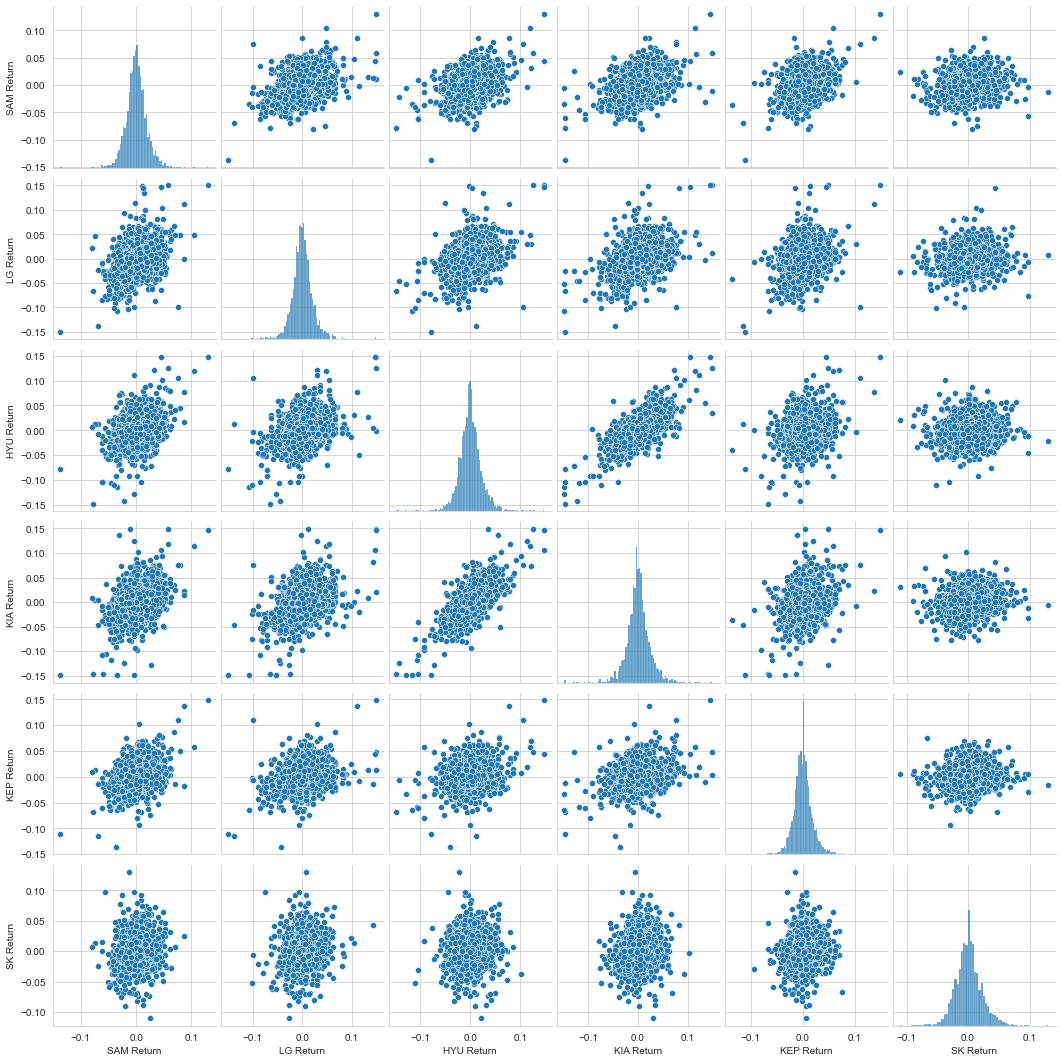

In [223]:
import seaborn as sns
sns.pairplot(returns)

** Using this returns DataFrame, figure out on what dates each stock had the best and worst single day returns. You should notice that 2 of the stocks share the same day for the worst drop, did anything significant happen that day?**

In [224]:
returns.idxmax()

SAM Return   2008-10-30
LG Return    2008-10-28
HYU Return   2008-11-21
KIA Return   2008-10-28
KEP Return   2008-10-30
SK Return    2015-06-01
dtype: datetime64[ns]

In [225]:
returns.idxmin()

SAM Return   2008-10-24
LG Return    2008-10-24
HYU Return   2008-10-16
KIA Return   2008-11-20
KEP Return   2008-10-10
SK Return    2015-08-18
dtype: datetime64[ns]

In October 2008 global stockmarkets fell sharply on several occasions, amidst growing fears of a severe global recession.

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [226]:
returns.std()

SAM Return    0.018555
LG Return     0.022576
HYU Return    0.022328
KIA Return    0.023832
KEP Return    0.018510
SK Return     0.021904
dtype: float64

KIA has the greatest standard deviation and hence volatility over the fourteen year period, however HYU and LG have very similar deviation over this time period.

In [227]:
returns.loc['2015-01-01':'2015-12-31'].std()
#calculate standard deviation over a specific period, in this case the year 2015

SAM Return    0.016602
LG Return     0.019577
HYU Return    0.019481
KIA Return    0.018718
KEP Return    0.017657
SK Return     0.026239
dtype: float64

SK Holdings had the greatest standard deviation and hence volatility over the year 2015.

** Create a distplot using seaborn of the 2015 returns for Samsung **

C:\Users\Tom.Ritman-Meer\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='SAM Return', ylabel='Density'>

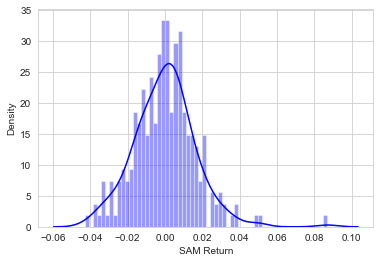

In [228]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['SAM Return'],color='blue',bins=60)

** Create a distplot using seaborn of the 2018 returns for SK **

C:\Users\Tom.Ritman-Meer\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='SK Return', ylabel='Density'>

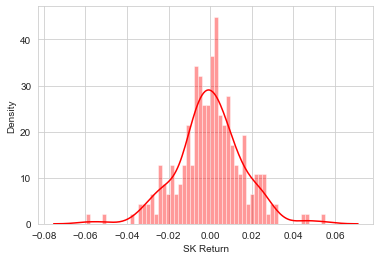

In [230]:
sns.distplot(returns.loc['2018-01-01':'2018-12-31']['SK Return'],color='red',bins=60)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

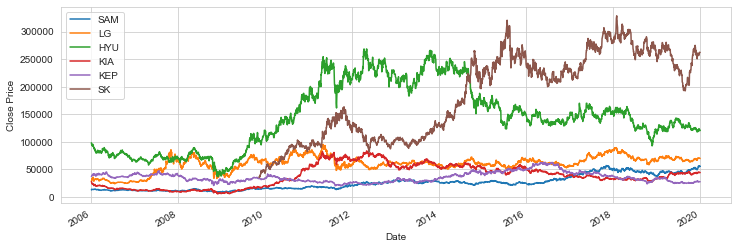

In [232]:
for t in tickers:
    stocks[t]['Close'].astype(float).plot(figsize=(12,4),label=t)
plt.ylabel('Close Price')
plt.legend()

Text(0, 0.5, 'Close Price')

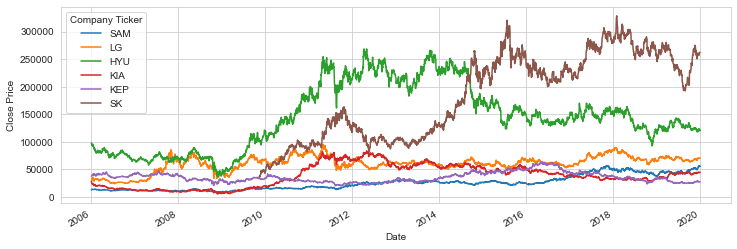

In [249]:
stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))
plt.ylabel('Close Price')

In [234]:
stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Samsung's stock for the year 2008**

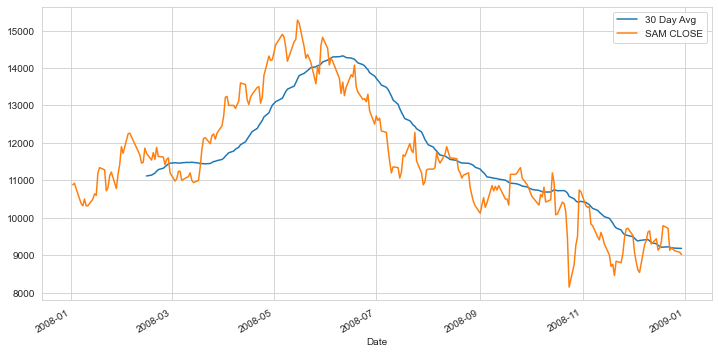

In [236]:
plt.figure(figsize=(12,6))
SAM['Close']=SAM['Close'].astype(float)
SAM['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
SAM['Close'].loc['2008-01-01':'2009-01-01'].plot(label='SAM CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

In [237]:
stock_corr = stocks.xs(key='Close',axis=1,level='Stock Info').corr()
stock_corr

Company Ticker,SAM,LG,HYU,KIA,KEP,SK
Company Ticker,,,,,,
SAM,1.000000,0.489550,0.312332,0.304947,0.046331,0.740005
LG,0.489550,1.000000,0.375562,0.333714,-0.110282,0.184814
HYU,0.312332,0.375562,1.000000,0.945402,-0.184372,-0.496851
KIA,0.304947,0.333714,0.945402,1.000000,-0.151909,-0.382911
KEP,0.046331,-0.110282,-0.184372,-0.151909,1.000000,0.460140
SK,0.740005,0.184814,-0.496851,-0.382911,0.460140,1.000000


<AxesSubplot:xlabel='Company Ticker', ylabel='Company Ticker'>

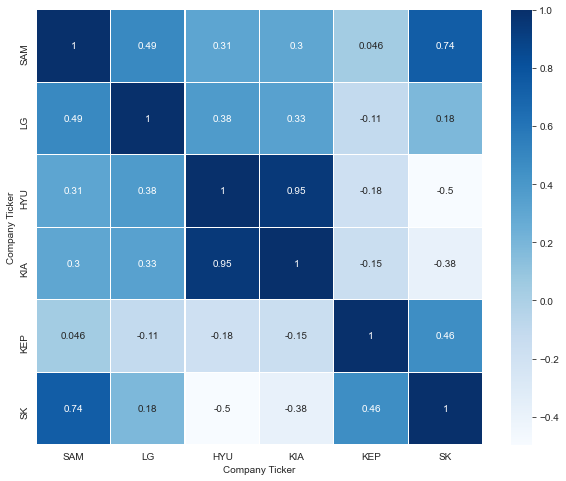

In [247]:
plt.figure(figsize=(10,8))
sns.heatmap(stock_corr,annot=True,linewidth=0.1,cmap='Blues')

** Optional: Use seaborn's clustermap to cluster the correlations together:**

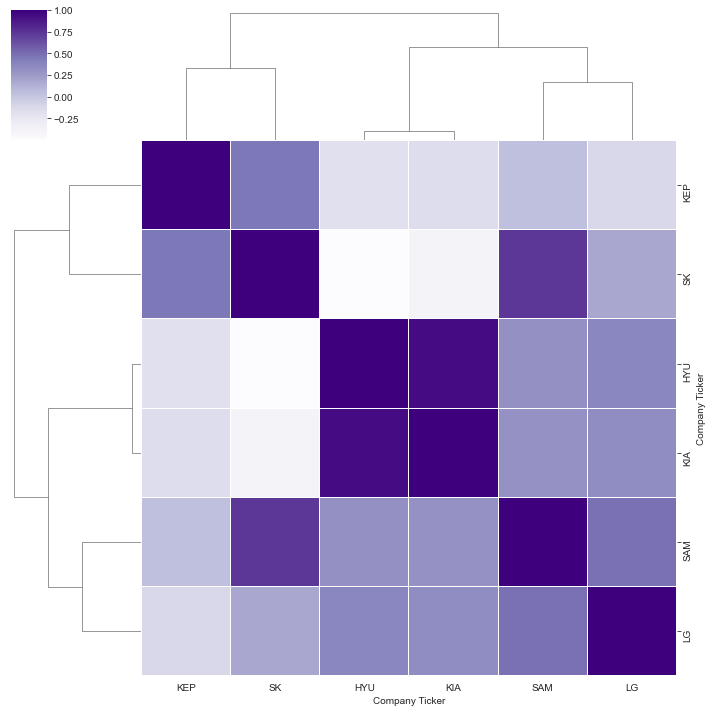

In [245]:
sns.clustermap(stock_corr,linewidth=0.1,cmap='Purples')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Samsung's stock from Jan 1st 2015 to Jan 1st 2016.**

In [240]:
SAM[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of LG for the year 2015.**

In [241]:
LG['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Hyundai for the year 2015.**

In [242]:
HYU['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization operations.